In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from scipy.optimize import curve_fit
from ROOT import TLorentzVector

Zs = pd.read_csv('Z_BBbar.csv')
#Zs = pd.read_csv('Z_MuMu.csv')
Zs.describe()

Welcome to JupyROOT 6.07/07


,iEvent,px1,py1,pz1,e1,px2,py2,pz2,e2
count,4.531694e+06,4.531694e+06,4.531694e+06,4.531694e+06,4.531694e+06,4.531694e+06,4.531694e+06,4.531694e+06,4.531694e+06
mean,2.499839e+06,-4.189535e-03,6.908879e-03,3.463045e-02,3.776172e+01,5.009518e-03,-6.627155e-03,-1.739087e-02,3.148915e+01
std,1.443390e+06,2.211245e+01,2.212141e+01,2.240808e+01,9.935631e+00,1.921302e+01,1.922354e+01,1.908777e+01,1.224669e+01
min,0.000000e+00,-4.518890e+01,-4.510350e+01,-4.392250e+01,7.637260e-04,-4.501730e+01,-4.506880e+01,-4.300590e+01,5.463150e-06
25%,1.249667e+06,-1.787650e+01,-1.787000e+01,-2.009477e+01,3.678932e+01,-1.449800e+01,-1.452610e+01,-1.557300e+01,2.732210e+01
50%,2.499896e+06,2.571095e-03,3.911610e-03,7.797005e-02,4.122715e+01,-1.613610e-03,-1.263825e-03,3.813260e-02,3.518020e+01
75%,3.749924e+06,1.784890e+01,1.787800e+01,2.016920e+01,4.339500e+01,1.451750e+01,1.451780e+01,1.549507e+01,4.039280e+01
max,4.999999e+06,4.508890e+01,4.512510e+01,4.341520e+01,4.702220e+01,4.507100e+01,4.507500e+01,4.365880e+01,4.714760e+01


In [2]:
%%time
Zs['PX'] = Zs.px1 + Zs.px2
Zs['PY'] = Zs.py1 + Zs.py2
Zs['PZ'] = Zs.pz1 + Zs.pz2
Zs['P'] = np.sqrt(Zs.PX**2 + Zs.PY**2 + Zs.PZ**2)
Zs['E'] = Zs.e1 + Zs.e2
Zs['M'] = np.sqrt(Zs.E**2 - Zs.P**2)

CPU times: user 1.31 s, sys: 113 ms, total: 1.42 s
Wall time: 542 ms


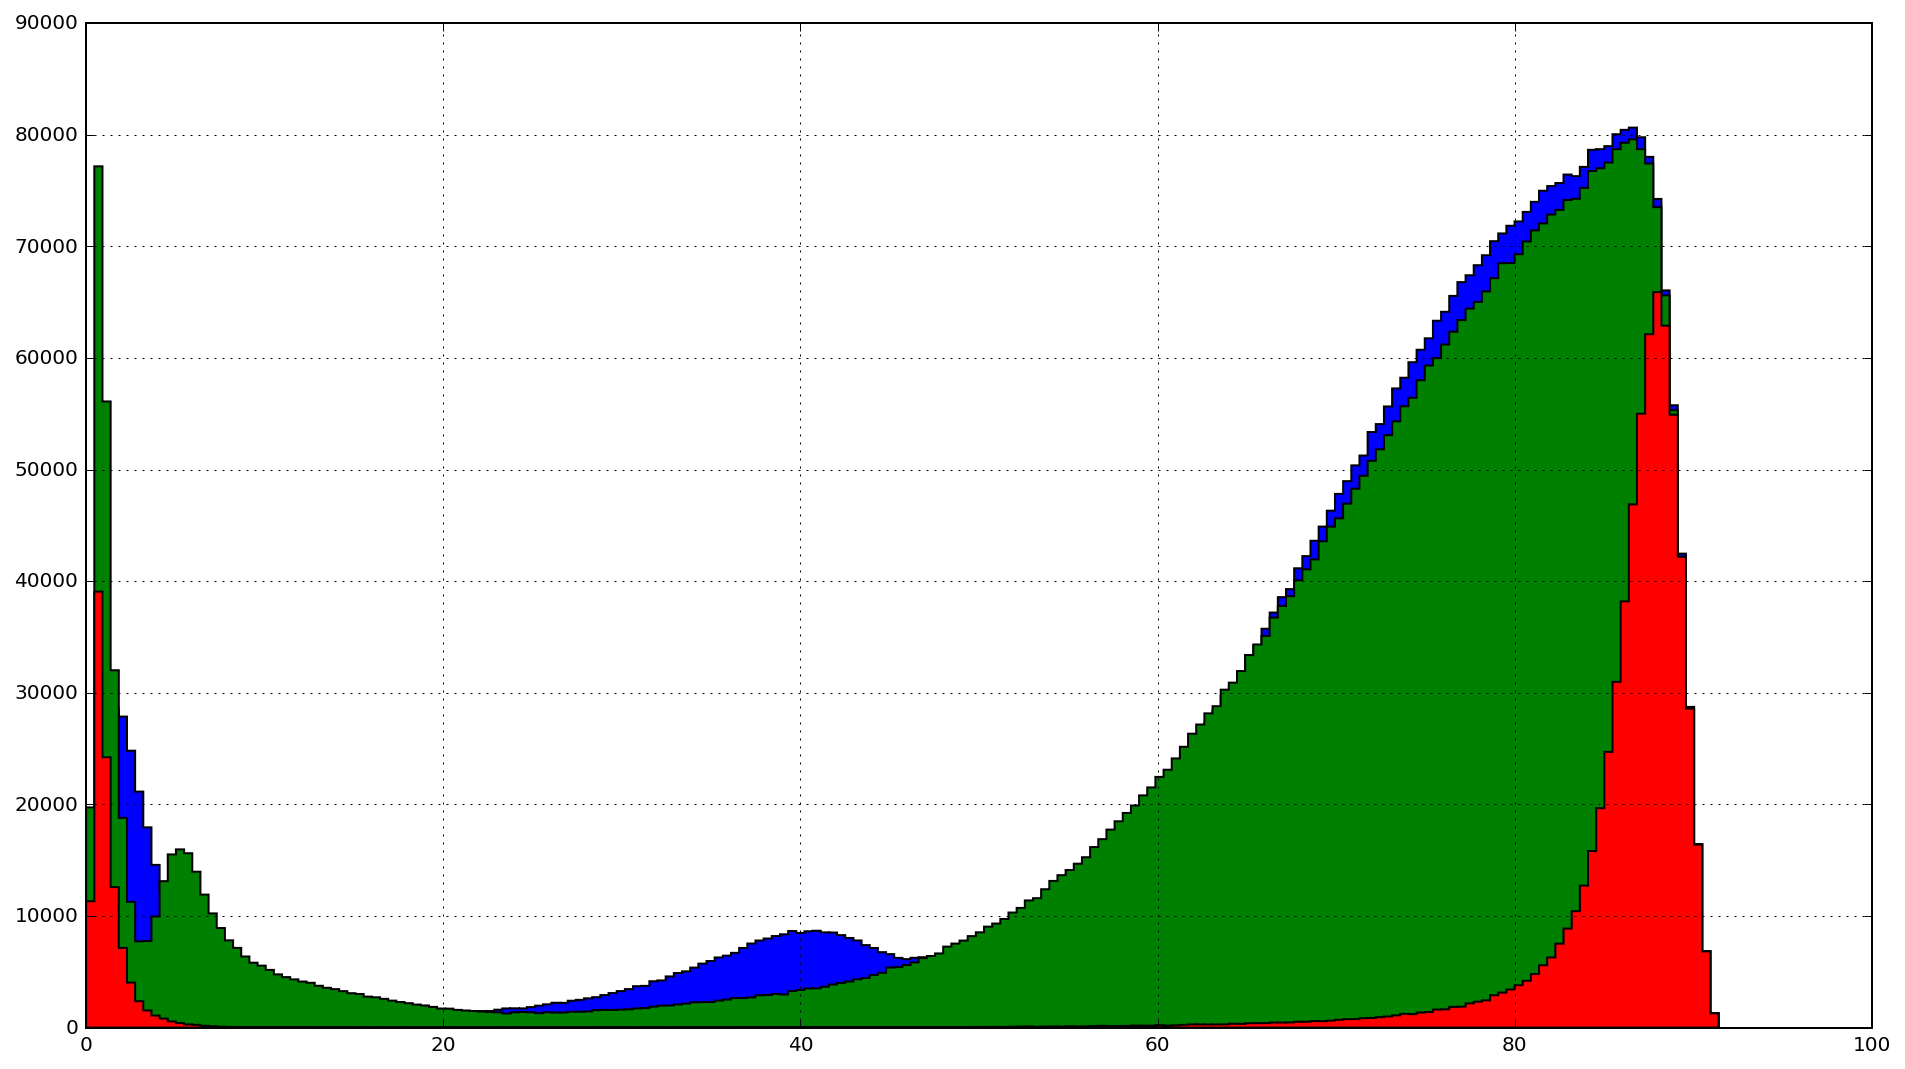

In [3]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
Zs.E.hist(bins=200,histtype=u'stepfilled')
Zs.M.hist(bins=200,histtype=u'stepfilled')
Zs[np.abs(Zs.P) < 2].M.hist(bins=200,histtype=u'stepfilled')
plt.show()

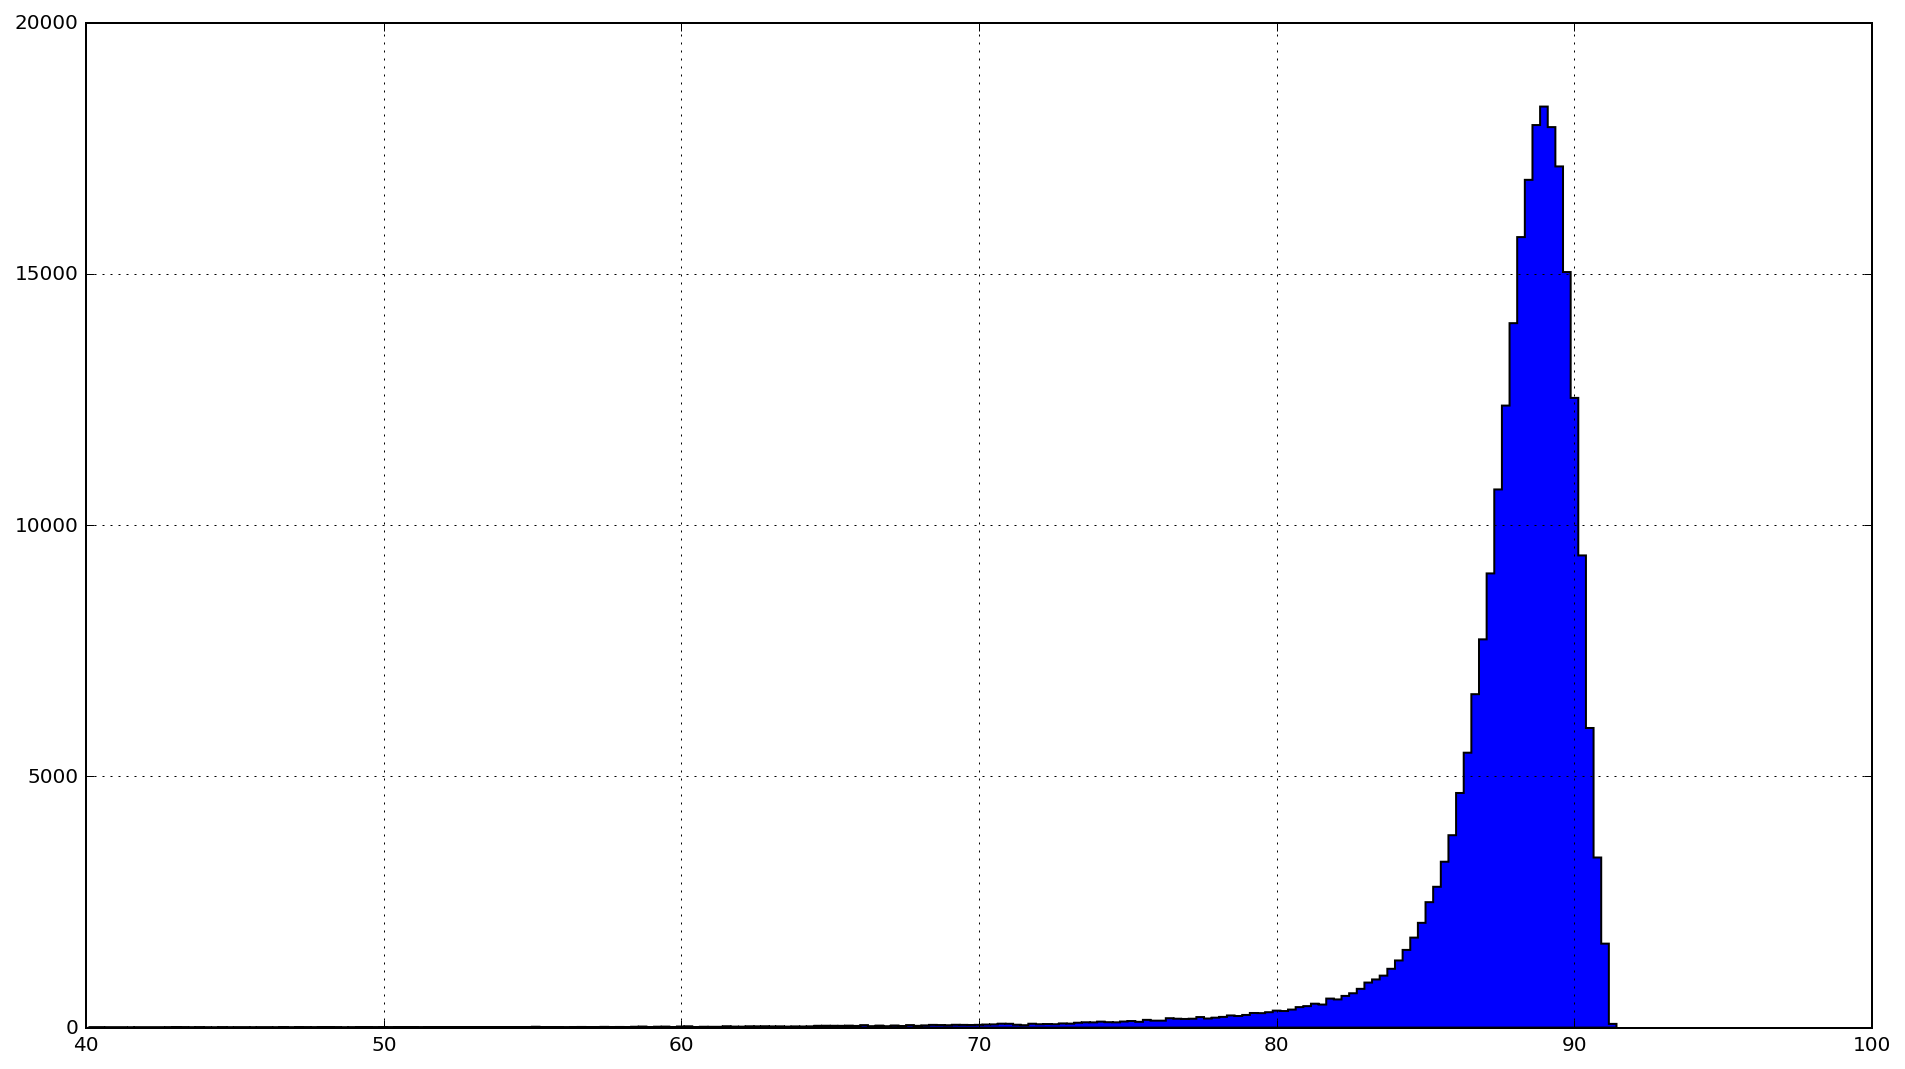

In [9]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
temp = Zs[np.abs(Zs.P) < 1]
temp = temp[temp.M > 40]
temp.M.hist(bins=200,histtype=u'stepfilled')
plt.show()

In [ ]:
p = TLorentzVector()
p1 = TLorentzVector()
p2 = TLorentzVector()
Zs['Mroot'] = np.zeros(len(Zs))
for i in xrange(len(Zs)):
    p1.SetPxPyPzE(Zs.px1[1],Zs.py1[1],Zs.pz1[1],Zs.e1[1])
    p2.SetPxPyPzE(Zs.px2[1],Zs.py2[1],Zs.pz2[1],Zs.e2[1])
    p = p1 + p2
    Zs['Mroot'][i] = p.M()